In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.palette="tab10"
sns.set_style("ticks")

# Introduction
  
Since the conclusion of WW2 there has been a worldwide drive for improvements in education, healthcare and general quality of life. This has been a largely successful endeavour, with global enrolment in primary education rising by 9% since 2005 and healthcare spending increasing globally. This has been largely due to a sharp rise global GDP per capita. There are a strong link between energy production/consumption and the GDP of a country. In the distant past work done was entirely human and thus production was strongly correlated to the workforce, e.g. without modern farming equipment the output of a farm was based on the physical output of the workers. In the modern world the amount of energy that can be produced, locally, nationally and globally has resulted in a massive increase in productivity and thus GPD.       
While this has had hugely positive effects socially and economically, it has been a disaster for the environment. Since 1880 global temperatures have risen by 1.8 degrees Celsius, sea levels are now rising by 3.2 mm per year and there has been a rise in extreme weather conditions. 

In [2]:
consumption_over_time = pd.read_csv("Data/Consumption_over_time.csv", engine='python')
co2_over_time = pd.read_csv("Data/CO2-emmisions_per_year.csv", engine='python')
headings = ["Million tonnes oil equivalent", "Oil", "Natural Gas", "Coal", 
            "Nuclear energy", "Hydro electric", "Renewables", "Total"]
energy_type_country_2016 = pd.read_csv("Data/2016consumption_by_type.csv", 
                                       names=headings, engine='python')
energy_type_country_2017 = pd.read_csv("Data/2017_consumption_by_type.csv", 
                                       names=headings, engine='python')

In [3]:
conv2017 = energy_type_country_2017.values
conv2016 = energy_type_country_2016.values
co2_time = co2_over_time.values
consumption = consumption_over_time.values

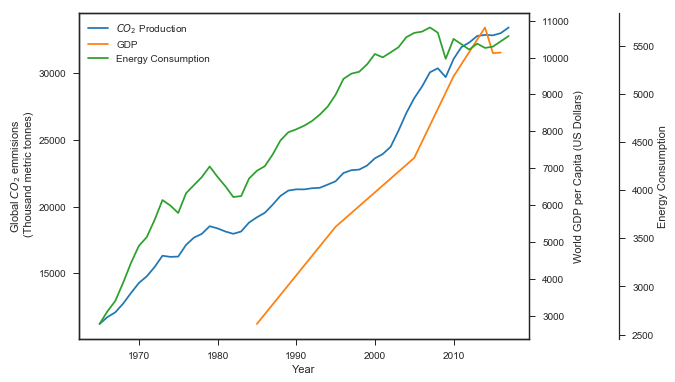

In [4]:
CO2_production = co2_time[107]
Consumption_over_time = consumption[108]


fig, host = plt.subplots(figsize=(10,6))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.2))
par2.spines["right"].set_visible(True)

p1, = host.plot(np.arange(1965, 2018), CO2_production[1:-3], 
                color='#1f77b4', label="$CO_2$ Production")
host.set_ylabel("Global $CO_2$ emmisions\n (Thousand metric tonnes)")

p2, = par1.plot([1985, 1995, 2005, 2010, 2014, 2015,2016], 
                [2775, 5409, 7278, 9489, 10815, 10120, 10134], 
                label="GDP", color='#ff7f0e')
par1.set_ylabel("World GDP per Capita (US Dollars)")

p3, = par2.plot(np.arange(1965, 2018), Consumption_over_time[1:-3], 
                color='#2ca02c', label="Energy Consumption")
par2.set_ylabel("Energy Consumption")

lns = [p1, p2, p3]

host.set_xlabel("Year")
host.legend(handles=lns, frameon=False)
plt.draw()
plt.savefig("Figures/Figure_1", dpi=600)

plt.show()

In [5]:
WORLD2017 = conv2017[82]
WORLD = {"2017": WORLD2017[1:-1], "2017": WORLD2017[1:-1], 
       "labels": ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", 
                  "Renewable"]}

elec = {"2017": [883.0, 5915.3, 9723.4, 2635.6, 4059.9, 2151.5, 182.6], 
       "labels": ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", 
                  "Renewable", "Other"]}

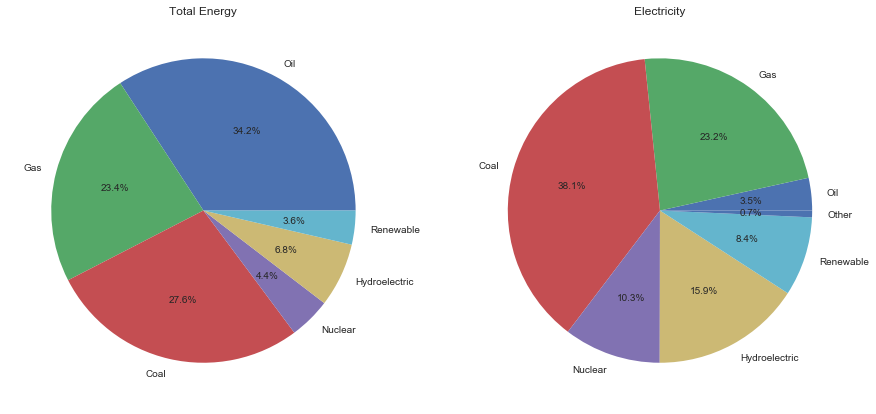

In [6]:
plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
ax1.axis("equal")
ax1.set_title("Total Energy")
ax1.pie(WORLD["2017"], labels=WORLD["labels"], autopct="%1.1f%%")

ax2 = plt.subplot(1, 2, 2)
ax2.axis("equal")
ax2.set_title("Electricity")
ax2.pie(elec["2017"], labels=elec["labels"], autopct="%1.1f%%")
plt.savefig("Figures/Figure_2", dpi=600)
plt.show()

Three fossil fuels (Coal, Oil and Gas) dominate the world’s energy production with oil being the biggest with a 34.2% share. This is of course due to the automotive industry and oil is only responsible for 3.5% of the world’s electricity. While the current situation is precarious the international community is now actively taking steps to address the problem. On an international level there have been numerous high profile treaties aimed at reducing global emissions, on a national level governments are pledging to move away from fossil fuels and on an individual level, millions of people across the globe are actively campaigning for a solution.       
There is no doubt that over the next 50 years there will be a massive change in the global energy market and this presents potential business opportunities for energy investment.

## Project Overview

In this analysis, my aim is to identify trends in global energy production. This requires several pieces of information   
1) Knowledge of a countries supply chain, how readily available are the raw materials required for a certain technology, e.g. nuclear energy and uranium mining.   
2) Public opinion - Is public opinion driving support for renewables or is there a strong anti-nuclear agenda.  
3) Energy needs - What are the energy demands of the country or region e.g. a city could not survive on a few wind farms.   
4) Current emissions and climate treaty commitments - Is there a strong commitment to reduce emission and move towards renewables, this could result in government incentives to private industry. 


## Methods

### Data

This is a large project and will require datasets from several sources. Exploratory analysis has been carried out using the following datasets  
1) BP review of global energy 2017 https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html  
2) United Nations statistical tables - http://data.un.org/  
3) Minerals UK - World Mineral Production - http://www.bgs.ac.uk/mineralsuk/statistics/worldStatistics.html  

## Tools

Analyses and visualisation were conducted with Python

## Exploratory Analysis

In this exploratory analysis I will provide information on the link between nuclear energy and greenhouse gas emissions. 
Analysis of the world mineral database illustrates clearly that Kazakhstan, Canada, Australia, Namibia and Niger are the biggest producers of uranium. Despite being the biggest producers of uranium, Kazakhstan, Australia and the African nations have no nuclear industry.
In the figure below I have shown the contributions from individual nations to the worlds uranium mining output. The data was obtained from the Minerals UK - World Mineral Production database.


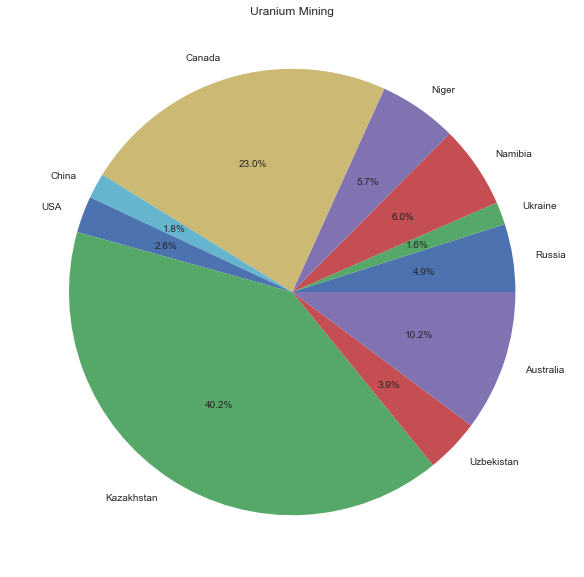

In [7]:
uranium_mining = {"Tonnes": [3005, 1005, 3657, 3478, 14037, 1123,
                             1616, 24575, 2404, 6234], 
       "labels": ["Russia", "Ukraine", "Namibia", "Niger", 
                  "Canada", "China", "USA", "Kazakhstan", 
                  "Uzbekistan", "Australia"]}

fig, ax = plt.subplots(figsize=(10,10))
ax.axis("equal")
ax.set_title("Uranium Mining")
ax.pie(uranium_mining["Tonnes"], labels=uranium_mining["labels"], autopct="%1.1f%%")
plt.savefig("Figures/Figure_3", dpi=600)

plt.show()

Below I have shown the contribution of Oil, Gas, Coal, Nuclear, Hydroelectric and renewables to the energy production of France, Canada, Kazakhstan, Australia, Africa and the Ukraine.

Kazakhstan, the world’s largest producer of uranium generates 96.2% of its energy from fossil fuels and Australia, the third biggest producer generates 93.7% of its energy from fossil fuels. Canada is the only top uranium miner that generates energy from nuclear (6.3%). 

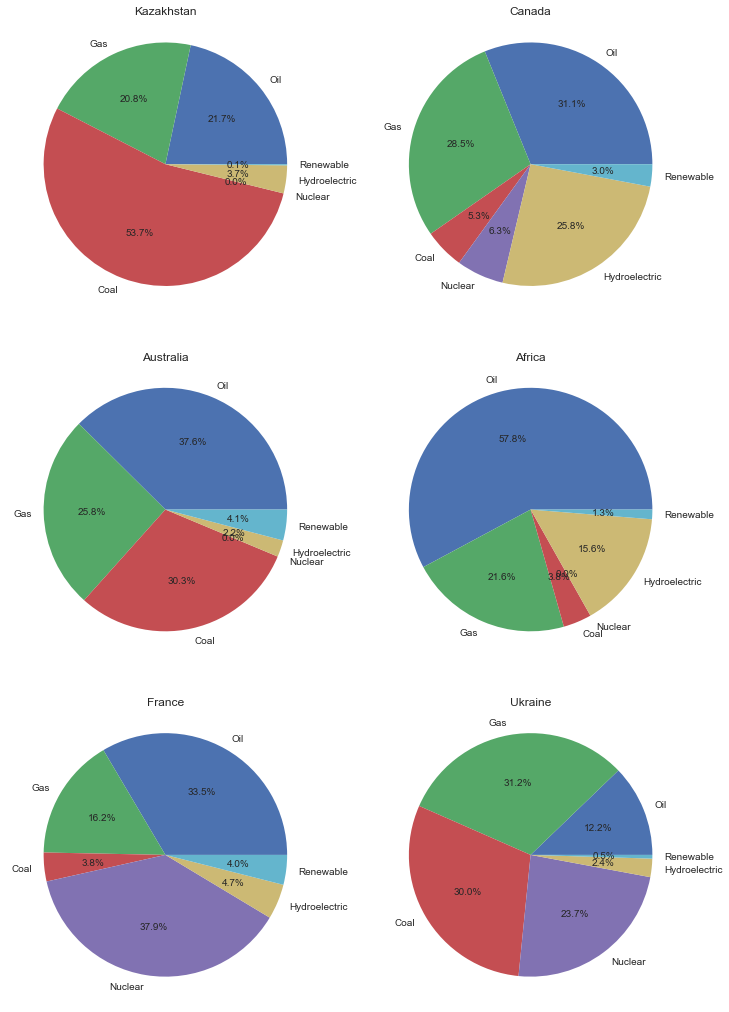

In [8]:
Labels = ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", "Renewable"]
KAZ = conv2017[40]
CANADA = conv2017[3]
AUS = conv2017[63]
AFRICA = conv2017[61]
CHINA = conv2017[65]
INDIA = conv2017[67]
FRANCE = conv2017[21]
UKRAINE = conv2017[43]

plt.figure(figsize=(12, 18))
ax1 = plt.subplot(3, 2, 1)
ax1.axis("equal")
ax1.set_title("Kazakhstan")
ax1.pie(KAZ[1:-1], labels=Labels, autopct="%1.1f%%")

ax2 = plt.subplot(3, 2, 2)
ax2.axis("equal")
ax2.set_title("Canada")
ax2.pie(CANADA[1:-1], labels=Labels, autopct="%1.1f%%")

ax3 = plt.subplot(3, 2, 3)
ax3.axis("equal")
ax3.set_title("Australia")
ax3.pie(AUS[1:-1], labels=Labels, autopct="%1.1f%%")

ax4 = plt.subplot(3, 2, 4)
ax4.axis("equal")
ax4.set_title("Africa")
ax4.pie(AFRICA[1:-1], labels=Labels, autopct="%1.1f%%")

ax7 = plt.subplot(3, 2, 5)
ax7.axis("equal")
ax7.set_title("France")
ax7.pie(FRANCE[1:-1], labels=Labels, autopct="%1.1f%%")

ax8 = plt.subplot(3, 2, 6)
ax8.axis("equal")
ax8.set_title("Ukraine")
ax8.pie(UKRAINE[1:-1], labels=Labels, autopct="%1.1f%%")
plt.savefig("Figures/Figure_4", dpi=600)

plt.show()

In the figure below I have shown the total energy production from coal, oil, gas, nuclear, hydroelectric and renewables of France and Canada. I have then shown the total CO2 emissions for the two countries over time.  
France, a country that has no uranium mining operations but has fully embraced nuclear energy over the last 20 years, generates 37.9% of its energy from nuclear energy. This coupled with its other renewable energy industries results in 46.6% of its energy coming from sources with zero emissions. As a result, its carbon emissions over the last 20 year period have been steadily declining. 
In contrast, Canada, a country that relies on fossil fuels for 64.9% of its energy, has been experiencing a gradual increase in emissions over the past 30 years.

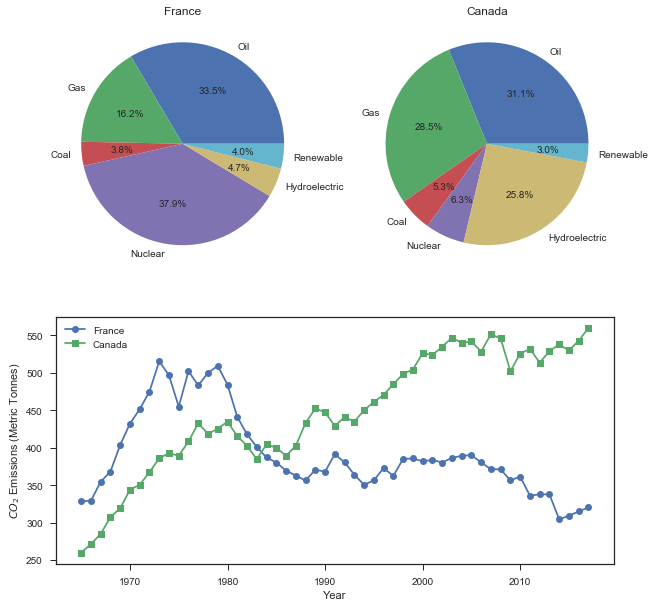

In [9]:
CO2_France = co2_time[28]
CO2_Ukraine = co2_time[59]
CO2_China = co2_time[89]
CO2_India = co2_time[91]
CO2_Kaz = co2_time[56]
CO2_aus = co2_time[87]
CO2_africa = co2_time[85]
CO2_canada = co2_time[2]
Time = np.arange(1965, 2018)

import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(10, 10))
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
ax2 = plt.subplot(gs[0, 1]) # row 0, col 1
ax3 = plt.subplot(gs[1, :]) # row 1, span all columns

ax1.axis("equal")
ax1.set_title("France")
ax1.pie(FRANCE[1:-1], labels=Labels, autopct="%1.1f%%")

ax2.axis("equal")
ax2.set_title("Canada")
ax2.pie(CANADA[1:-1], labels=Labels, autopct="%1.1f%%")

ax3.plot(Time, CO2_France[1:-3], label="France", marker="o")
ax3.plot(Time, CO2_canada[1:-3], label="Canada", marker="s")
ax3.set_ylabel("$CO_2$ Emissions (Metric Tonnes)")
ax3.set_xlabel("Year")
ax3.legend(frameon=False)

plt.savefig("Figures/Figure_5", dpi=600)

plt.show()

This is a project with a strong business focus, it is interesting to a wider audience and it has a strong moral grounding.
If taken further I would seek to identify emerging energy markets for renewable energy investment. For example, I would aim to identify countries with rising energy demands and strong supply chains that would support investment in clean energy technologies e.g. sunny climates, the ability to mine silicon and an educated workforce would support solar energy investment. I would also like to use this project as an opportunity to improve education surrounding energy and aim to dispel some of the myths surrounding energy in the 21st Century.
